# Работа с API

In [1]:
import vk

In [2]:
login = '.......' # введите свой логин, лучше номер телефона
password = '........' # свой пароль
vk_id = '....' # id приложения vk
# чтобы создать приложение https://vk.com/dev - Мои приложения - Создать приложение - Standalone

v = '5.103'

In [3]:
session = vk.AuthSession(app_id=vk_id, user_login=login, user_password=password) 
vkapi = vk.API(session, v=v)

# Задание 1

Получите список всех городов региона, в которых есть хотя бы одно учебное заведение и выведите их количество. Результат сохраните в формате csv.

**Возьмем Мурманскую область.**

In [87]:
print(vkapi.database.getCities(country_id=1, region_id=1060316)['count'])

134


In [88]:
City = vkapi.database.getCities(country_id=1, region_id=1060316, need_all = 0, count = 1000)['items']

In [89]:
import time
#чтобы избежать ошибку Too many requests per second немного замедлим процесс 
Uni = {}
for i in City:
    Uni[i['title']] = vkapi.database.getUniversities(city_id = i['id'])['count']
    if Uni[i['title']] == 0:
        del Uni[i['title']]
    time.sleep(0.5)

In [8]:
print(Uni)

{'Апатиты': 5, 'Кандалакша': 1, 'Кировск': 2, 'Ковдор': 1, 'Кола': 1, 'Мончегорск': 4, 'Мурманск': 26}


In [90]:
#сохраняем csv
import csv
with open('murmansk.csv', 'w') as f:
    for key in Uni.keys():
        f.write("%s,%s\n"%(key,Uni[key]))

# Работа с друзьями

**Задание 2.1**

Построить по этим данным графики для себя и для ещё одного произвольно выбранного пользователя. Например, распределение друзей по полу, возрасту, университетам.


**Произвольно выберем Антонину.**
Начнем с распределения друзей по полу.

In [91]:
#считаем гендеры

genders = vkapi.friends.get (user_id=62488495, fields='sex')['items']
female = 0
male = 0
for i in genders:
    if i['sex'] == 1:
        female += 1
    elif i['sex'] == 2:
        male += 1
        
genders2 = vkapi.friends.get (user_id=67171, fields='sex')['items']
female1 = 0
male2 = 0
for i in genders2:
    if i['sex'] == 1:
        female1 += 1
    elif i['sex'] == 2:
        male2 += 1

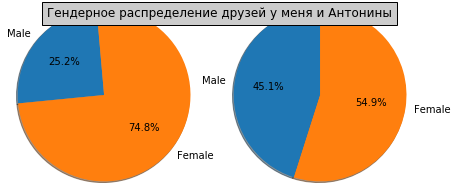

In [92]:
#Визуализируем
import matplotlib.pyplot as plt

labels = 'Male', 'Female'
sizes = male, female
sizes2 = male2, female1
fig = plt.figure()

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(sizes, labels=labels, radius = 1.5, autopct='%1.1f%%',
        shadow=True, startangle=95)
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(sizes2, labels=labels, radius = 1.5, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Гендерное распределение друзей у меня и Антонины", bbox={'facecolor':'0.8', 'pad':5}, loc = 'right')
plt.show()

Далее изучим распределение друзей по возрасту.

In [18]:
#получаем даты рождения
#у многих, однако, она не указана, либо есть только месяц-день
#но используем, что есть
ages = vkapi.friends.get (user_id=62488495, fields='bdate')['items']
bs = []
for i in ages:
    if 'bdate' in i and len(i['bdate']) >= 8:
        bs.append(i['bdate'])
ages2 = vkapi.friends.get (user_id=67171, fields='bdate')['items']
bs2 = []
for i in ages2:
    if 'bdate' in i and len(i['bdate']) >= 8:
        bs2.append(i['bdate'])

In [19]:
#считаем возраст

from datetime import date, timedelta
from datetime import datetime
a = []
for i in bs:
    data = datetime.strptime(i.replace('.', '/'),'%d/%m/%Y').date()
    age = (date.today() - data) // timedelta(days=365.2425)
    a.append(age)
a.sort()
    
a2 = []
for i in bs2:
    data = datetime.strptime(i.replace('.', '/'),'%d/%m/%Y').date()
    age = (date.today() - data) // timedelta(days=365.2425)
    a2.append(age)
a2.sort()

In [20]:
#считаем частнотность
y = {}
for i in a:
    if i not in y:
        y[i] = a.count(i)
        
y1 = {}
for i in a2:
    if i not in y1:
        y1[i] = a2.count(i)
        
print(y)
print(y1)

{20: 2, 22: 3, 23: 2, 24: 5, 25: 11, 26: 4, 27: 5, 28: 2, 29: 2, 30: 3, 31: 2, 33: 3, 35: 1, 36: 1, 39: 1, 40: 2, 42: 1, 48: 1, 53: 2, 56: 1, 71: 1}
{18: 1, 19: 3, 21: 1, 22: 4, 23: 2, 24: 1, 25: 7, 26: 4, 27: 4, 28: 4, 29: 18, 30: 36, 31: 9, 32: 17, 33: 5, 34: 3, 35: 1, 39: 1, 41: 1, 44: 1, 48: 1, 67: 1, 82: 1, 114: 1}


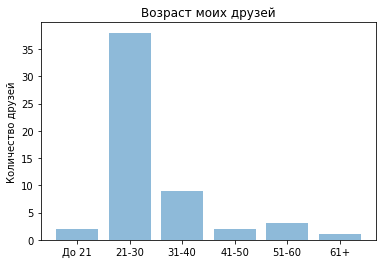

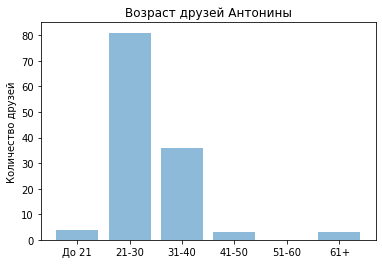

In [70]:
#визуализируем
import numpy as np
year = ('До 21', '21-30', '31-40', '41-50', '51-60', '61+')
y_pos = np.arange(len(year))
age = [2, 38, 9, 2, 3, 1]

plt.bar(y_pos, age, align='center', alpha=0.5)
plt.xticks(y_pos, year)
plt.ylabel('Количество друзей')
plt.title('Возраст моих друзей')

plt.show()


year1 = ('До 21', '21-30', '31-40', '41-50', '51-60', '61+')
y_pos = np.arange(len(year))
age1 = [4, 81, 36, 3, 0, 3]

plt.bar(y_pos, age1, align='center', alpha=0.5)
plt.xticks(y_pos, year1)
plt.ylabel('Количество друзей')
plt.title('Возраст друзей Антонины')

plt.show()

Осталось узнать про университеты.

In [5]:
#считаем частотность
#убираем те университеты, где учился только 1 человек для чистоты визуализации

#мои_друзья
Fr = vkapi.friends.get (user_id=62488495, fields='universities')['items']
myunis = []
for i in Fr:
    if 'universities' in i:
        for j in i['universities']:
            a = j['name']
            myunis.append(a)
unisfreq = {}
for i in myunis:
    if i not in unisfreq:
        a = myunis.count(i)
        if a > 1:
            unisfreq[i] = a

uni = list(unisfreq.items())
uni.sort(key=lambda i: i[1], reverse=True)
y = []
x = []
for i in uni:
    y.append(i[0].strip("\r\n"))
    x.append(i[1])
    
#аналогично для Антонины 
Fr2 = vkapi.friends.get (user_id=67171, fields='universities')['items']
myunis2 = []
for i in Fr2:
    if 'universities' in i:
        for j in i['universities']:
            a = j['name']
            myunis2.append(a)
unisfreq2 = {}
for i in myunis2:
    if i not in unisfreq2:
        a = myunis2.count(i)
        if a > 1:
            unisfreq2[i] = a

uni2 = list(unisfreq2.items())
uni2.sort(key=lambda i: i[1], reverse=True)
y2 = []
x2 = []
for i in uni2:
    y2.append(i[0].strip("\r\n"))
    x2.append(i[1])

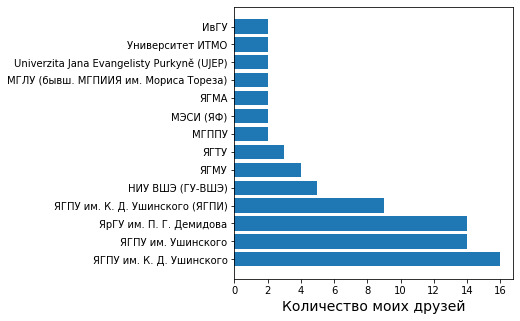

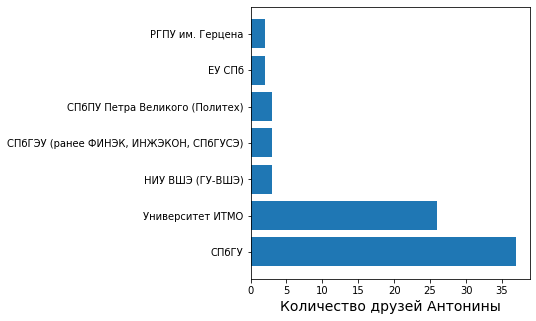

In [6]:
#визуализируем

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
ax = plt.subplot()
height = x
bars = y
y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
ax.set_xlabel('Количество моих друзей', size = 14)
plt.show()

plt.figure(figsize=(5,5))
ax = plt.subplot()
height = x2
bars = y2
y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
ax.set_xlabel('Количество друзей Антонины', size = 14)
plt.show()

**Задание 2.2**

Посчитаем fr-индекс: fr - количество друзей, у которых есть не менее fr - общих друзей

In [5]:
import requests
friends = vkapi.friends.get (user_id=62488495)['items']
mutfriends = []

def vkam (method, parameters, token):
    return requests.get('https://api.vk.com/method/%s?%s&access_token=%s' % (method, '&'.join(parameters), token)).json()

In [22]:
#Access denied: user deactivated
#убираем мертвые странички, которые выдают ошибку выше
#готовый список друзей
friends = [820813, 1160726, 1782918, 1935631, 2679915, 3068870, 3923297, 4664466, 4907443, 5305863, 5595441, 7332650, 8792511, 8802056, 8817962, 9619695, 10353088, 10364784, 10783723, 10868122, 12129208, 12351508, 15053153, 15357760, 15914326, 16063660, 16465944, 17476257, 21912216, 22233185, 22852601, 24371510, 24519586, 25364210, 27139035, 27475373, 29297396, 32798784, 33781736, 40284864, 40768972, 41585148, 41700266, 42953273, 43867939, 44518288, 45378342, 45779447, 47522289, 47540560, 47830246, 51663427, 52662984, 55228728, 55377304, 56262870, 59519757, 61396585, 62067621, 62568202, 67604806, 67778817, 68484658, 68545514, 69811667, 72849813, 73146184, 73835830, 73914729, 74092141, 75448590, 81758445, 83676087, 84089968, 86363301, 88692473, 90078511, 91231848, 93860557, 94512399, 95832895, 98970634, 103704030, 103875755, 113773552, 117830981, 126375502, 135472824, 144243053, 146935063, 151981243, 154309093, 155862445, 158463996, 158689245, 163373426, 165486321, 167339776, 169127379, 169836813, 173562841, 177389212, 178175910, 188780890, 189886891, 193390710, 194252009, 200210026, 206609909, 207101935, 214773911, 218985470, 220501682, 228746328, 253623046, 259233119, 261404802, 266460047, 273065729, 281781230, 286429213, 288060216, 296031643, 296444909, 299752446, 358813404, 381328778, 394458864, 395677951, 444925382, 445318167, 457869197, 460460134, 461027308, 479650143, 490664677, 513099862, 529042528, 530035509, 537045008, 574759814]

In [23]:
#считаем общих друзей и составляем словарь
import time
for i in friends:
    m = len(vkam('friends.getMutual', ['source_uid=%s' % 62488495, 'order=hints', 'target_uid=%s' % i, 'v=5.103'], 'e6391288274b168f19b51b2dfb7b30f078d567701b064fdf16f10d5359116548ae311ac8e6257aa233c9d')['response'])
    mutfriends.append(m)
    time.sleep(1)
    
mut = {}
for i in mutfriends:
    if i not in mut:
        mut[i] = mutfriends.count(i)

Найдем уже наконец-то индекс fr. Как и для индекса Хирша отсортируем по значениям (общим друзьям) от большего к меньшему.
Находим ту пару значений, где число общих друзей прямо пропорционально количеству друзей, их имеющих.
Судя по всему, это число 7. 

In [25]:
list_d = list(mut.items())
list_d.sort(key=lambda i: i[1], reverse=True)
for i in list_d:
    print(i[0], ':', i[1])

1 : 24
0 : 19
5 : 12
8 : 12
3 : 12
6 : 8
7 : 7
10 : 5
2 : 5
9 : 5
11 : 5
4 : 4
12 : 4
15 : 3
13 : 2
18 : 2
20 : 2
16 : 2
52 : 1
30 : 1
24 : 1
28 : 1
23 : 1
19 : 1
27 : 1
22 : 1


# Работа с группами (сообществами)

**Задание 3.1**

Кто больше всех лайкает сообщения на стене сообщества?


In [4]:
#Всего в паблике 234 записи, скачаем все.
import time
Documents = vkapi.wall.get(domain='dhcenter', count = 100)['items']
Documents += vkapi.wall.get(domain='dhcenter', offset = 100, count = 100)['items']
Documents += vkapi.wall.get(domain='dhcenter', offset = 100, count = 34)['items']
len(Documents)

234

In [5]:
#соберем всех кто что-то лайкал
Likers = []
for i in Documents:
    like = vkapi.likes.getList(type = 'post', owner_id=-171987344, item_id=i['id'])
    for j in like['items']:
        Likers.append(j)
    time.sleep(0.35)

In [6]:
#составим топ 10 самых лайкающих пользователей и найдем их имена_фамилии
likesmylikes = {}
for i in Likers:
    if i not in likesmylikes:
        likesmylikes[i] = Likers.count(i)
list_l = list(likesmylikes.items())
list_l.sort(key=lambda i: i[1], reverse=True)
top = list_l[0:10]

for i in top:
    a = vkapi.users.get(user_ids = i[0]) 
    print(a[0]['last_name'], a[0]['first_name'], i[1], "лайков")
    time.sleep(0.35)

Шатрова Оля 160 лайков
Сидорова Света 127 лайков
Пучковская Антонина 99 лайков
Романова Виктория 97 лайков
Михайлова Марта 66 лайков
Руссианова Олеся 61 лайков
Панов Дмитрий 46 лайков
Новохацкая Есения 45 лайков
Sizova Irina 40 лайков
Тен Наталья 40 лайков


**Задание 3.2**

Какие самые популярные сообщества у членов сообщества? Для этого нужно в описании vk api найти метод для получения сообществ, на которые подписан пользователь.

In [4]:
#составим список из пользователей этого сообщества
import time
dhfans = vkapi.groups.getMembers(group_id = 171987344)['items']

#придется убрать приватные аккаунты
for i in dhfans:
    if 'is_closed' in vkapi.users.get(user_ids = i, fields ='is_closed')[0] and vkapi.users.get(user_ids = i, fields ='is_closed')[0]['is_closed'] == True:
        dhfans.remove(i)
    time.sleep(0.7)
    
#не все зацепились через user.get
#но их тоже убираем
private = [74752526, 33726423, 15583715, 96137381, 240397, 1993078, 3106510, 3534153, 6685108, 10580094, 98946070, 110127329,  218733127, 231604402, 286692867, 364192199, 369683245, 376756015, 390073482, 396762719, 411166615, 435923958, 441756745, 458490505, 480296929, 497733879, 570780578, 581931119, 586190019]
for i in private:
    dhfans.remove(i)

In [47]:
#составим список всех сообществ и посчитаем сколько подписчиков dhcentre в них состоит

communities = [] 
for i in dhfans:
    com = vkapi.groups.get(user_id = i, extended = 1)['items']
    for j in com:
        communities.append(j['name'])
    time.sleep(0.5)
    
top_com = {}    
for i in communities:
    if i not in top_com:
        top_com[i] = communities.count(i)

In [48]:
#оставим 15 самых популярных сообществ и выведем сколько в них человек из подписчиков dh
list_top = list(top_com.items())
list_top.sort(key=lambda i: i[1], reverse=True)
top = list_top[0:15]

for i in top:
    print(i[0], i[1], "человек")
    time.sleep(0.35)

DHCenter 483 человек
Vandrouki | Путешествия почти бесплатно (RU) 196 человек
Arzamas 170 человек
ПостНаука 145 человек
Теории и практики 126 человек
«Медуза» 126 человек
Журнал «Нож» 125 человек
Лентач 118 человек
Системный Блокъ 118 человек
«Бумага» 111 человек
Гранты,стипендии,стажировки! Обучение за рубежом 110 человек
ITMO.STUDENTS 108 человек
The Village Петербург 104 человек
KudaGo: Home | Санкт-Петербург 99 человек
Интересные события в Санкт-Петербурге 97 человек


**Задание 3.3**

Получить ядро активности 1 для сообщества и сравнить со списком подписчиков.

Ядро активности 1 - это пользователи, которые совершили хотя бы одно действие.

Для этого нужно научиться разбирать ответ и искать там авторов комментариев, а также пользователей, сделавших репосты.

In [45]:
#у нас уже есть список пользователей, которое лайкали хоть что-то
#дополним его теми, кто комментировал 
Users = Likers
for i in Documents:
    prof = vkapi.wall.getComments(owner_id = -171987344, post_id = i['id'], extended = 1, count = 100)["profiles"]
    if len(prof) > 0:
        for j in prof:
            Users.append(j['id'])
    time.sleep(0.5)

# С репостами сложнее, от них придется отказаться.
В методе wall.get мы видим лишь их количество, но не пользователей, а другие методы не доступны обывателю.


In [46]:
#в наш список попали те юзеры, которые совершили хоть одну операцию, нам нужно ядро активности 1
#поэтому просто убираем все повторения, чтобы получить финальный список

allusers = []
for i in Users:
    if i not in allusers:
        allusers.append(i)

In [93]:
#Создадим два списка - участников сообщества, входящих в ядро активности 1, и активных мимокрокодилов

members = []
notmembers = []

for i in allusers:
    if vkapi.groups.isMember(group_id = 171987344, user_id = i) == 1:
        members.append(i)
    else: 
        notmembers.append(i)
    time.sleep(0.35)

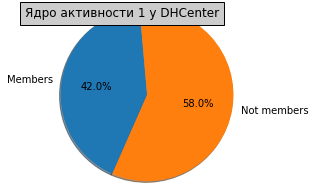

In [66]:
#визуализируем полученное распределение 

import matplotlib.pyplot as plt

labels = 'Members', 'Not members'
sizes = len(members), len(notmembers)
fig = plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(sizes, labels=labels, radius = 1.5, autopct='%1.1f%%',
        shadow=True, startangle=95)
plt.title("Ядро активности 1 у DHCenter", bbox={'facecolor':'0.8', 'pad':5}, loc = 'right')
plt.show()

Я ожидала, что будут активными скорее подписчики, но раз так добавим в список notmembers имена и фамилии и получим готовый список потенциальной заинтересованной в DH проектах аудитории и сохраним его в csv.

In [77]:
potential_audience = {}
for i in notmembers:
    if i not in potential_audience:
        a = vkapi.users.get(user_ids = i) 
        potential_audience[i] = [a[0]['last_name'], a[0]['first_name']]
    time.sleep(0.35)

In [78]:
import csv
with open('audience.csv', 'w') as f:
    for key in potential_audience.keys():
        f.write("%s,%s\n"%(key,potential_audience[key]))